# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("penguins.csv")
raw_data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


评估数据整齐度

In [3]:
raw_data.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
93,Adelie,Dream,39.6,18.1,186.0,4450.0,MALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE


符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准

评估数据干净度

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从输出结果上看，总共344行数据，其中 culmen_length_mm  ，culmen_depth_mm ，flipper_length_mm，body_mass_g ， sex 都存在缺失值。另外species，island ，sex 都表示种类，因此可以先给它们转换成 category 类型

In [5]:
raw_data["species"] = raw_data["species"].astype('category')
raw_data["island"] = raw_data["island"].astype('category')
raw_data["sex"] = raw_data["sex"].astype('category')

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


评估缺失数据

 culmen_length_mm ，culmen_depth_mm ，flipper_length_mm，body_mass_g ， sex 都存在缺失值，可以把它们都提取出来查看情况

In [7]:
raw_data[raw_data["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
raw_data[raw_data["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
raw_data[raw_data["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
raw_data[raw_data["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
raw_data[raw_data["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


从输出结果来看，culmen_length_mm ，culmen_depth_mm ，flipper_length_mm，body_mass_g 中都是第3、第339行存在数据缺失，缺失的数据对于分析结果有非常大的影响，因此可以把它们删除

In [12]:
raw_data.drop(3, inplace = True)
raw_data.drop(339, inplace = True)

在 sex 缺失的数据中，其他数据都存在，且pandas 、matplotlib 以及 seaborn 会自动忽略缺失值，因此可以保留 sex 缺失值

评估重复数据

从数据变量的含义来看，是允许数据重复的，因此不需要查看重复数据

评估不一致数据

所有分类变量都可能存在不同的值指代同一种目标的情况，需要查看是否存在这种情况

In [13]:
raw_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [14]:
raw_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [15]:
raw_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

从输出结果看，species ，island 中都不存在不一致的值指代同一种目标的情况。在 sex 中存在 . 的sex，明显存在问题，应当把 . 改为空值

In [16]:
raw_data["sex"].replace(".", np.nan, inplace = True)
raw_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

评估无效或错误数据

In [17]:
raw_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从输出上看不存在无效或者错误的数据

探索数据

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

In [18]:
raw_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


确定色盘

In [19]:
sns.set_palette("deep")

企鹅种类比例

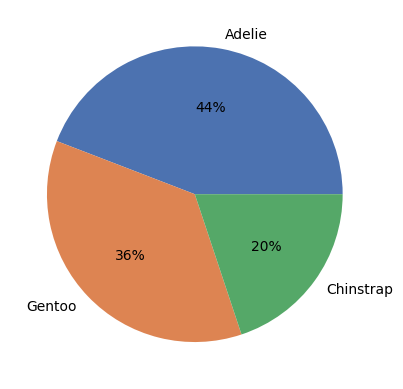

In [20]:
class_species = raw_data["species"].value_counts()
plt.pie(class_species, autopct='%.0f%%', labels =class_species.index)
plt.show()

从图中可以看出，企鹅中以Adelie占比最大，Gentoo次之，Chinstrap最后，约占1/5左右

企鹅所属岛屿比例

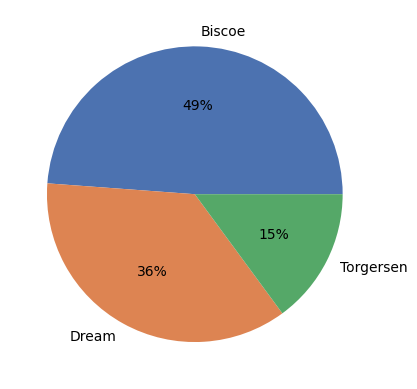

In [21]:
class_island = raw_data["island"].value_counts()
plt.pie(class_island, autopct='%.0f%%', labels =class_island.index)
plt.show()

从图中可以看出，在 Biscoe 岛中的企鹅最多，约占50%，Dream次之，Torgersen 最少

企鹅性别比例

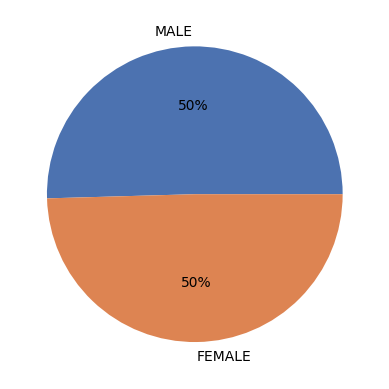

In [22]:
class_sex = raw_data["sex"].value_counts()
plt.pie(class_sex, autopct='%.0f%%', labels =class_sex.index)
plt.show()

抽样中的性别比列为1：1，符合抽样规则

不同岛上的企鹅种类数量

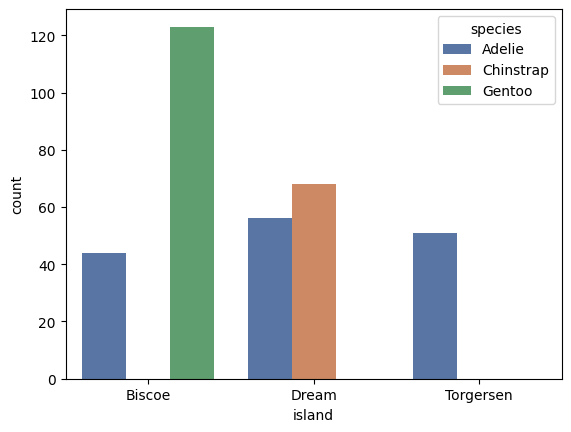

In [23]:
sns.countplot(raw_data, x = "island", hue = "species")
plt.show()

从上图可以看出，Adelie 这种种类的企鹅在每个岛上均有分布，而 Chinstrap 这种种类的企鹅只有 Dream 岛上有分布。 Gentoo 这种种类的企鹅只有 Biscoe 岛上有分布

不同岛屿上的企鹅性别数量

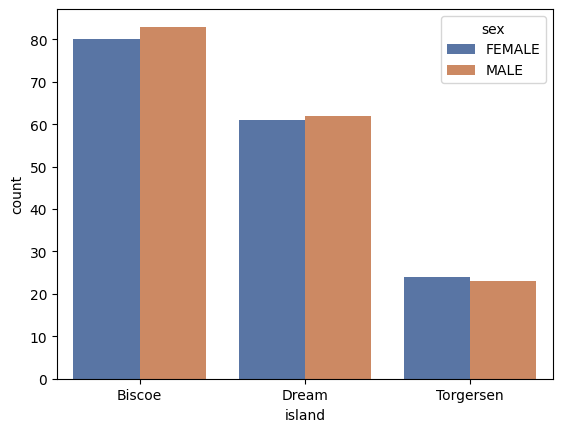

In [24]:
sns.countplot(raw_data, x = "island", hue = "sex")
plt.show()

从图中可以看出，在抽样的样本中，每个岛中的性别比例大致都是1：1

查看数值之间的相关关系

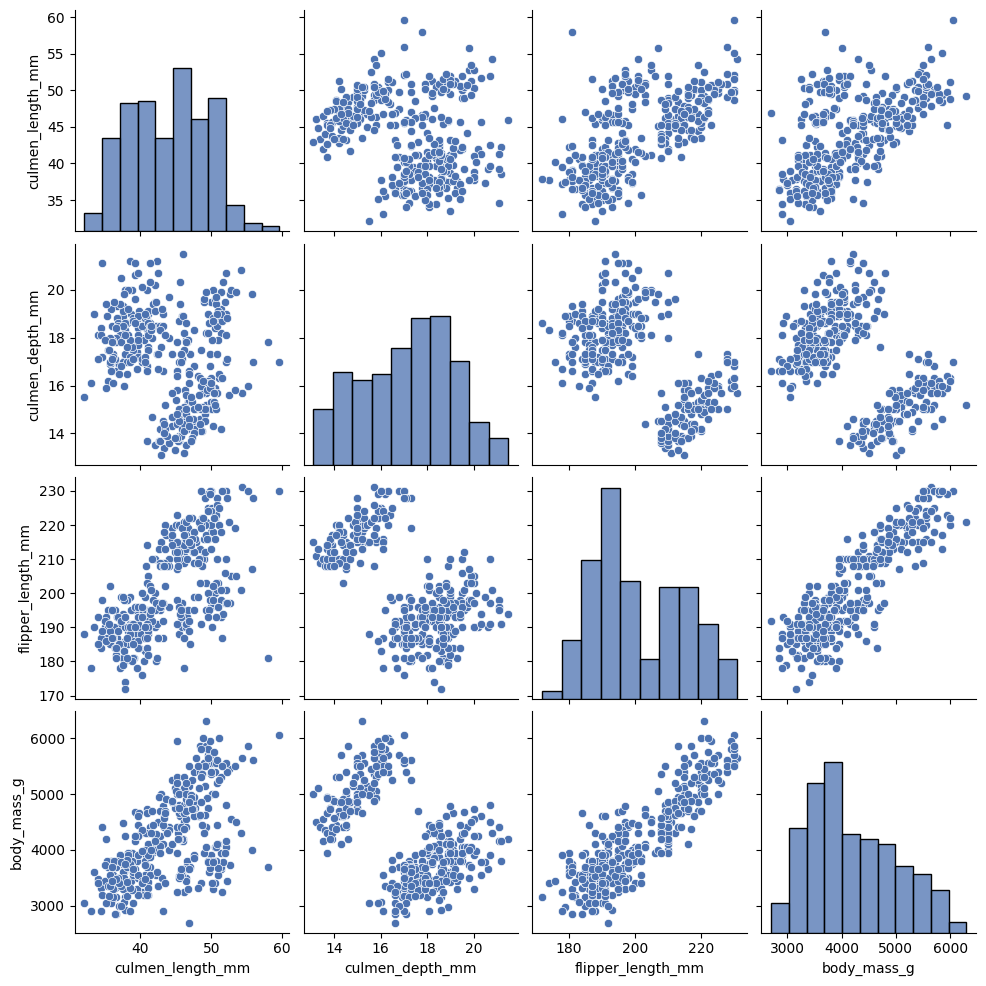

In [25]:
sns.pairplot(raw_data)
plt.show()

从直方图的形态上看，不符合正态分布，可能与样本数量太少有关，也可能与包含的种类多有关
从散点图的形态上看，存在多个集群分布，可能与种类或者性别有关，可以在后续进行查看

根据种类查看数值之间的相关关系

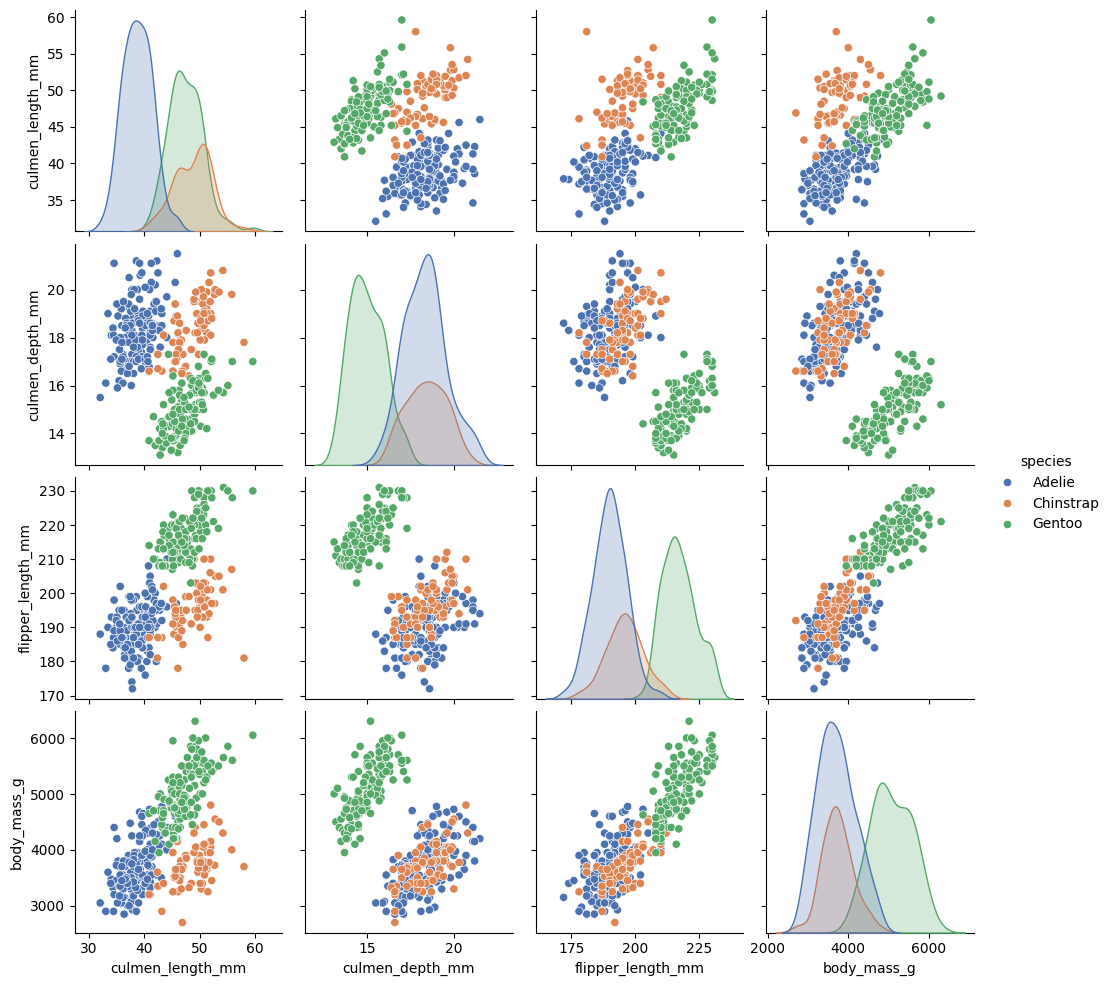

In [26]:
sns.pairplot(raw_data, hue = "species")
plt.show()

不同的颜色白哦是不同的企鹅种类，从分布图上看，不同的种类的企鹅集群分布都是聚集在一起的，且大致呈现正相关的线性分布状态，这可以有效的让我们推算不同种类企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度

从密度图的分布来看，可以得到以下关于样本的发现：

Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。
但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

根据性别查看数值之间的相关关系

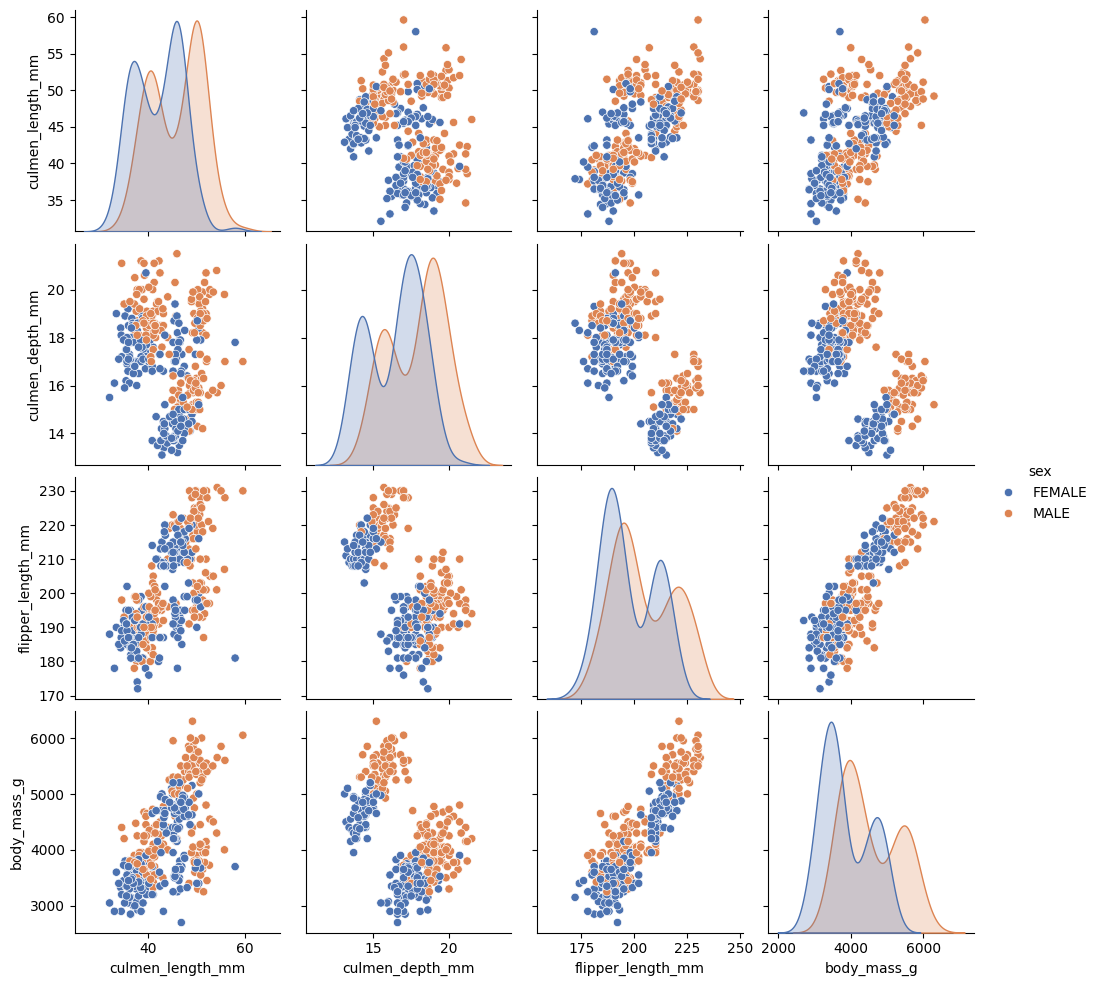

In [27]:
sns.pairplot(raw_data, hue = "sex")
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。